<a href="https://colab.research.google.com/github/lukrak2002/lecture1/blob/main/PUM4_regresja_todo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

zaczytanie niezbędnych bibliotek

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler

zaczytaj dane dotyczace sprzedazy

In [ ]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Salary Data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rkiattisak/salaly-prediction-for-beginer",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-5-72cc2aa30810>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 18.9k/18.9k [00:00<00:00, 23.5MB/s]

First 5 records:     Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


preprocessing

1.   sprawdż typy danych
2.   zmien etykiedy na zmienne liczbowe
3. w przypadku brakujacych danych uzupelnij (w przypadku etykiet) najczesciej wystepującą wartością lub średnią wartością



In [ ]:
df.dtypes

,0
Age,float64
Gender,object
Education Level,object
Job Title,object
Years of Experience,float64
Salary,float64


In [ ]:
# Replace '_' and '- ' with empty strings in column labels
df.columns = df.columns.str.replace('_', '', regex=False).str.replace('- ', '', regex=False).str.replace(' ', '', regex=False)

In [ ]:
df.dtypes

,0
Age,float64
Gender,object
EducationLevel,object
JobTitle,object
YearsofExperience,float64
Salary,float64


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Gender', 'EducationLevel', 'JobTitle']:
    df[col] = le.fit_transform(df[col])

print("First 5 records:", df.head())

First 5 records:     Age  Gender  EducationLevel  JobTitle  YearsofExperience    Salary
0  32.0       1               0       159                5.0   90000.0
1  28.0       0               1        17                3.0   65000.0
2  45.0       1               2       130               15.0  150000.0
3  36.0       0               0       101                7.0   60000.0
4  52.0       1               1        22               20.0  200000.0


w przypadku brakujacych danych uzupelnij (w przypadku etykiet) najczesciej wystepującą wartością lub średnią wartością

In [ ]:
# prompt: w przypadku brakujacych danych uzupelnij (w przypadku etykiet) najczesciej wystepującą wartością lub średnią wartością

# Fill missing values with the most frequent value for categorical columns and the mean for numerical columns
for column in df.columns:
    if df[column].dtype == object:
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

print("First 5 records after filling missing values:", df.head(15))


First 5 records after filling missing values:      Age  Gender  EducationLevel  JobTitle  YearsofExperience    Salary
0   32.0       1               0       159                5.0   90000.0
1   28.0       0               1        17                3.0   65000.0
2   45.0       1               2       130               15.0  150000.0
3   36.0       0               0       101                7.0   60000.0
4   52.0       1               1        22               20.0  200000.0
5   29.0       1               0        81                2.0   55000.0
6   42.0       0               1        93               12.0  120000.0
7   31.0       1               0       104                4.0   80000.0
8   26.0       0               0        82                1.0   45000.0
9   38.0       1               2       150               10.0  110000.0
10  29.0       1               1       158                3.0   75000.0
11  48.0       0               0        40               18.0  140000.0
12  35.0       1  

<ipython-input-18-19725e99a896>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


Podziel zbiór danych na testowy i treningowy w stosunku 30/70

In [ ]:
# prompt: Podziel zbiór danych na testowy i treningowy w stosunku 30/70

# Podziel zbiór danych na testowy i treningowy w stosunku 30/70
X = df.drop('Salary', axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Stworz model regresji liniowej korzystajac z parametrów domyślnych
Przykład dokumentacji: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

ocen model na zbiorze testowym za pomocą miar: średni błąd kwadratowy, średni błąd absolutny, wynik wyjaśnionej wariancji

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# Przewidywanie na zbiorze testowym
y_pred = regressor.predict(X_test)

# Obliczanie miar
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

# Wypisywanie wyników
print(f"Średni błąd kwadratowy (MSE): {mse:.2f}")
print(f"Średni błąd absolutny (MAE): {mae:.2f}")
print(f"Wynik wyjaśnionej wariancji (EVS): {evs:.2f}")


Średni błąd kwadratowy (MSE): 251384617.98
Średni błąd absolutny (MAE): 10976.82
Wynik wyjaśnionej wariancji (EVS): 0.88


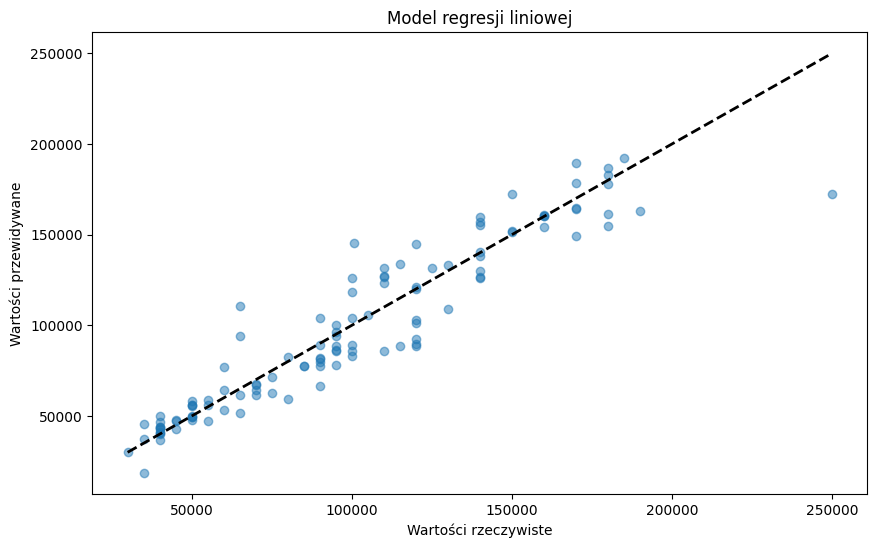

In [ ]:
# prompt: przedstaw model regresji w matplotlib

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Wartości przewidywane')
plt.title('Model regresji liniowej')
plt.show()


In [ ]:
# prompt: pokaż rekordy z wartościami rzeczywistymi powyżej 200000

# Wyświetl rekordy z wartościami rzeczywistymi powyżej 200000
print(df[df['Salary'] > 200000])


      Age  Gender  EducationLevel  JobTitle  YearsofExperience    Salary
30   50.0       1               0         6               25.0  250000.0
83   52.0       1               2         8               24.0  250000.0
105  44.0       1               2         7               16.0  220000.0


In [ ]:
df = df.drop(df[df['Salary'] > 200000].index)

In [ ]:
print(df[df['Salary'] > 200000])

Empty DataFrame
Columns: [Age, Gender, EducationLevel, JobTitle, YearsofExperience, Salary]
Index: []


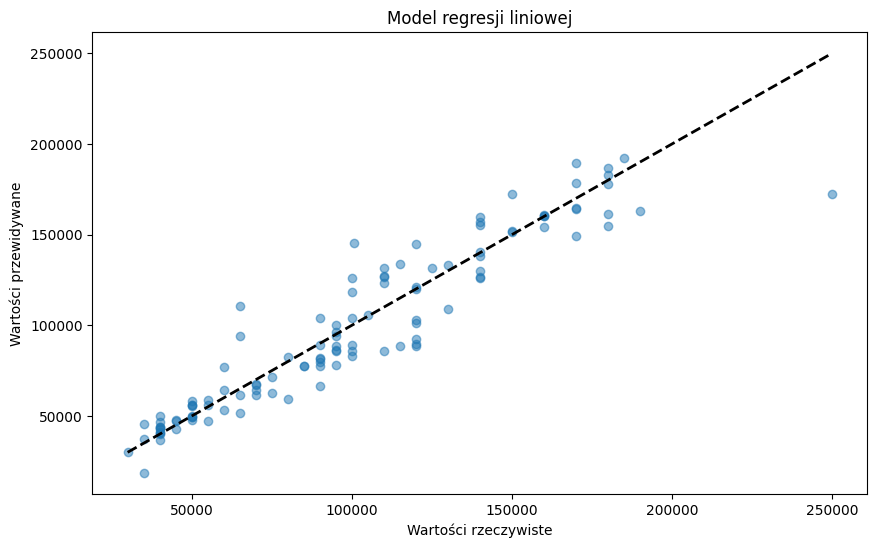

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Wartości przewidywane')
plt.title('Model regresji liniowej')
plt.show()


spróbuj poprawić model, zacznij od danych, sprawdz korelacje, znormalizuj

Zbuduj model regresji odpornej i przetestuj jego predykcje


HuberRegressor:
Średni błąd kwadratowy (MSE): 235800204.55
Średni błąd absolutny (MAE): 10787.79
Wynik wyjaśnionej wariancji (EVS): 0.89


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


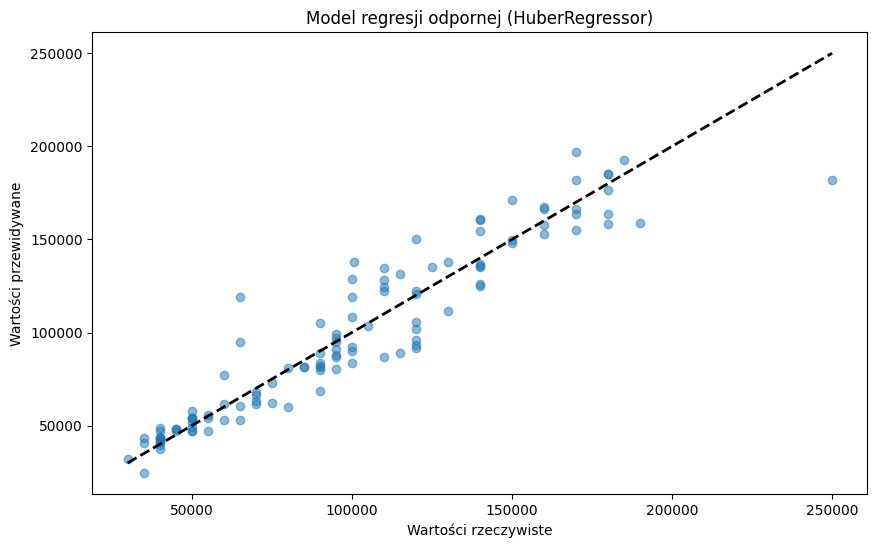

In [ ]:
# prompt: create with this model HuberRegressor

from sklearn.linear_model import HuberRegressor

# ... (previous code remains the same)

# Zbuduj model regresji odpornej (HuberRegressor)
huber_regressor = HuberRegressor().fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
y_pred_huber = huber_regressor.predict(X_test)

# Obliczanie miar dla HuberRegressor
mse_huber = mean_squared_error(y_test, y_pred_huber)
mae_huber = mean_absolute_error(y_test, y_pred_huber)
evs_huber = explained_variance_score(y_test, y_pred_huber)

# Wypisywanie wyników dla HuberRegressor
print(f"\nHuberRegressor:")
print(f"Średni błąd kwadratowy (MSE): {mse_huber:.2f}")
print(f"Średni błąd absolutny (MAE): {mae_huber:.2f}")
print(f"Wynik wyjaśnionej wariancji (EVS): {evs_huber:.2f}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_huber, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Wartości przewidywane')
plt.title('Model regresji odpornej (HuberRegressor)')
plt.show()


Wykreś przewidziane i faktyczne wartości obu modeli (przykład w dokumentacji: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py)

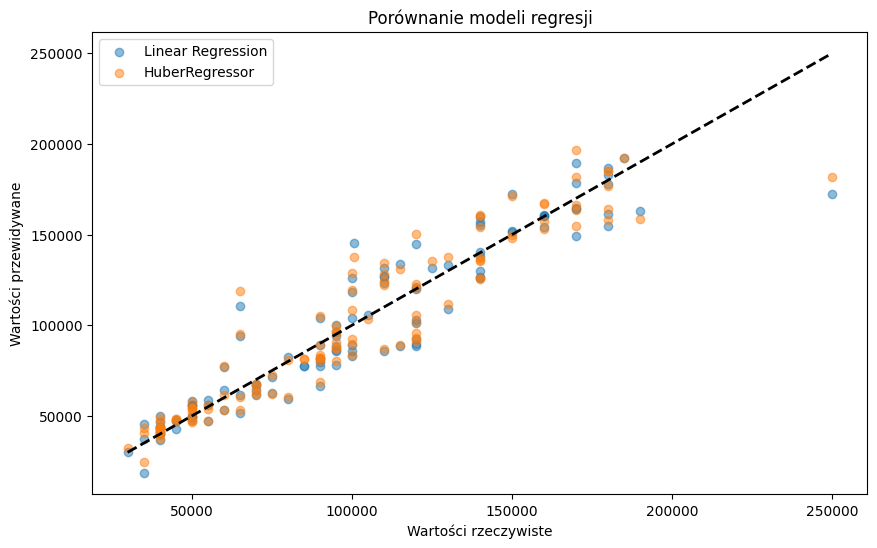

In [ ]:
# prompt: Wykreś przewidziane i faktyczne wartości obu modeli (przykład w dokumentacji: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_huber, alpha=0.5, label='HuberRegressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Wartości przewidywane')
plt.title('Porównanie modeli regresji')
plt.legend()
plt.show()


Zmodyfikuj kod, zeby zwizualizować wynik lepszego z modeli

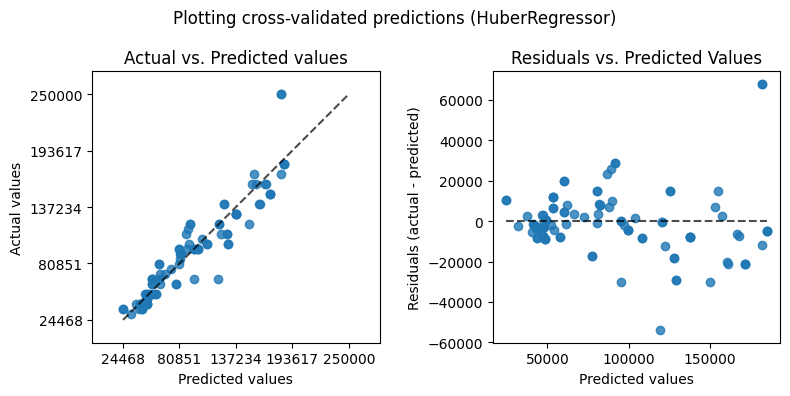

In [ ]:
# prompt: using this code:
# import matplotlib.pyplot as plt
# from sklearn.metrics import PredictionErrorDisplay
# fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
# PredictionErrorDisplay.from_predictions(
#     y,
#     y_pred=y_pred,
#     kind="actual_vs_predicted",
#     subsample=100,
#     ax=axs[0],
#     random_state=0,
# )
# axs[0].set_title("Actual vs. Predicted values")
# PredictionErrorDisplay.from_predictions(
#     y,
#     y_pred=y_pred,
#     kind="residual_vs_predicted",
#     subsample=100,
#     ax=axs[1],
#     random_state=0,
# )
# axs[1].set_title("Residuals vs. Predicted Values")
# fig.suptitle("Plotting cross-validated predictions")
# plt.tight_layout()
# plt.show()
# do: Zmodyfikuj kod, zeby zwizualizować wynik lepszego z modeli

# ... (previous code remains the same)

# Zmodyfikuj kod, zeby zwizualizować wynik lepszego z modeli

if evs_huber > evs:
  # Wyświetl wykres dla HuberRegressor, jeśli ma lepszy wynik wyjaśnionej wariancji
  import matplotlib.pyplot as plt
  from sklearn.metrics import PredictionErrorDisplay

  fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
  PredictionErrorDisplay.from_predictions(
      y_test,
      y_pred=y_pred_huber,
      kind="actual_vs_predicted",
      subsample=100,
      ax=axs[0],
      random_state=0,
  )
  axs[0].set_title("Actual vs. Predicted values")
  PredictionErrorDisplay.from_predictions(
      y_test,
      y_pred=y_pred_huber,
      kind="residual_vs_predicted",
      subsample=100,
      ax=axs[1],
      random_state=0,
  )
  axs[1].set_title("Residuals vs. Predicted Values")
  fig.suptitle("Plotting cross-validated predictions (HuberRegressor)")
  plt.tight_layout()
  plt.show()
else:
  # Wyświetl wykres dla Linear Regression, jeśli ma lepszy wynik wyjaśnionej wariancji
  import matplotlib.pyplot as plt
  from sklearn.metrics import PredictionErrorDisplay

  fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
  PredictionErrorDisplay.from_predictions(
      y_test,
      y_pred=y_pred,
      kind="actual_vs_predicted",
      subsample=100,
      ax=axs[0],
      random_state=0,
  )
  axs[0].set_title("Actual vs. Predicted values")
  PredictionErrorDisplay.from_predictions(
      y_test,
      y_pred=y_pred,
      kind="residual_vs_predicted",
      subsample=100,
      ax=axs[1],
      random_state=0,
  )
  axs[1].set_title("Residuals vs. Predicted Values")
  fig.suptitle("Plotting cross-validated predictions (Linear Regression)")
  plt.tight_layout()
  plt.show()


In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()